In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [14]:
df_list = []
for f in os.listdir("./output"):
    df = pd.read_csv("output/" + f)
    df['ds'] = os.path.splitext(f)[0]
    df_list.append(df)
df = pd.concat(df_list)
df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.train_logLik,metrics.val_logLik,params.model_type,params.optimizer,...,params.data_path,params.base_distribution,params.log_level,params.seed,params.log_file,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type,ds
0,2bd7b2128af4446aacc1c61ce2c1ce5f,627665463722477363,FINISHED,file:///home/david/NEAT_remote/NEAT_code/neat/...,2023-05-03 07:36:49.869000+00:00,2023-05-03 07:38:25.155000+00:00,193.396179,386.792358,ModelType.INTER,<keras.optimizers.legacy.adam.Adam object at 0...,...,real,"tfp.distributions.Normal(""Normal"", batch_shape...",info,3,train.log,carefree-rat-60,david,hp.py,LOCAL,real
1,e63de3a96e3d43668cf0e1a2b1945bc3,627665463722477363,FINISHED,file:///home/david/NEAT_remote/NEAT_code/neat/...,2023-05-03 07:35:57.307000+00:00,2023-05-03 07:36:49.837000+00:00,193.422577,386.851624,ModelType.LS,<keras.optimizers.legacy.adam.Adam object at 0...,...,real,"tfp.distributions.Normal(""Normal"", batch_shape...",info,3,train.log,unequaled-kit-875,david,hp.py,LOCAL,real
2,4c0a15f150954cd4931a5eda92238170,627665463722477363,FINISHED,file:///home/david/NEAT_remote/NEAT_code/neat/...,2023-05-03 07:35:47.640000+00:00,2023-05-03 07:36:46.931000+00:00,175.661011,395.087616,ModelType.INTER,<keras.optimizers.legacy.adam.Adam object at 0...,...,real,"tfp.distributions.Normal(""Normal"", batch_shape...",info,2,train.log,rumbling-loon-422,david,hp.py,LOCAL,real
3,bc8b2a963e164d8fad97577131ac29ab,627665463722477363,FINISHED,file:///home/david/NEAT_remote/NEAT_code/neat/...,2023-05-03 07:35:29.694000+00:00,2023-05-03 07:35:57.274000+00:00,193.396179,386.792358,ModelType.INTER,<keras.optimizers.legacy.adam.Adam object at 0...,...,real,"tfp.distributions.Normal(""Normal"", batch_shape...",info,3,train.log,invincible-fowl-684,david,hp.py,LOCAL,real
4,cc05f9c15f124a9081991aebb18c7561,627665463722477363,FINISHED,file:///home/david/NEAT_remote/NEAT_code/neat/...,2023-05-03 07:35:28.782000+00:00,2023-05-03 07:37:20.799000+00:00,193.582764,386.983215,ModelType.INTER,<keras.optimizers.legacy.adam.Adam object at 0...,...,real,"tfp.distributions.Normal(""Normal"", batch_shape...",info,3,train.log,hilarious-cow-172,david,hp.py,LOCAL,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,fb80a2cbdc95400c8f9611c4cd3b7cab,823547104211283574,FINISHED,file:///home/david/NEAT_remote/NEAT_code/neat/...,2023-05-02 16:15:06.351000+00:00,2023-05-02 16:15:37.402000+00:00,0.390968,-4.331044,ModelType.LS,<keras.optimizers.legacy.adam.Adam object at 0...,...,boston,"tfp.distributions.Normal(""Normal"", batch_shape...",info,1,train.log,bittersweet-ray-422,david,hp.py,LOCAL,boston
1940,66f1775f18764484bc77bbd07118e0f8,823547104211283574,FINISHED,file:///home/david/NEAT_remote/NEAT_code/neat/...,2023-05-02 16:15:06.341000+00:00,2023-05-02 16:15:39.786000+00:00,-1.960667,-7.500846,ModelType.LS,<keras.optimizers.legacy.adam.Adam object at 0...,...,boston,"tfp.distributions.Normal(""Normal"", batch_shape...",info,1,train.log,bedecked-tern-525,david,hp.py,LOCAL,boston
1941,2f80b0c6d2624e4eaa3b28d49f3dc155,823547104211283574,FINISHED,file:///home/david/NEAT_remote/NEAT_code/neat/...,2023-05-02 16:15:06.323000+00:00,2023-05-02 16:15:50.277000+00:00,0.766043,-5.466389,ModelType.LS,<keras.optimizers.legacy.adam.Adam object at 0...,...,boston,"tfp.distributions.Normal(""Normal"", batch_shape...",info,1,train.log,upset-ant-644,david,hp.py,LOCAL,boston
1942,b15048f3a8e744f0824bc9e452c2115f,823547104211283574,FINISHED,file:///home/david/NEAT_remote/NEAT_code/neat/...,2023-05-02 16:15:06.319000+00:00,2023-05-02 16:16:31.056000+00:00,0.451351,-3.478088,ModelType.LS,<keras.optimizers.legacy.adam.Adam object at 0...,...,boston,"tfp.distributions.Normal(""Normal"", batch_shape...",info,1,train.log,casual-mouse-33,david,hp.py,LOCAL,boston


In [15]:
df.columns

Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.train_logLik', 'metrics.val_logLik',
       'params.model_type', 'params.optimizer', 'params.fast',
       'params.y_base_units', 'params.y_top_units', 'params.x_dropout',
       'params.learning_rate', 'params.x_layers', 'params.x_units',
       'params.y_dropout', 'params.data_path', 'params.base_distribution',
       'params.log_level', 'params.seed', 'params.log_file',
       'tags.mlflow.runName', 'tags.mlflow.user', 'tags.mlflow.source.name',
       'tags.mlflow.source.type', 'ds'],
      dtype='object')

In [17]:
all_params = ['params.model_type',
       'params.y_base_units', 'params.y_top_units', 'params.x_dropout',
       'params.learning_rate', 'params.x_layers', 'params.x_units', 'params.seed',
       'params.y_dropout']
relevant_params = ['params.y_base_units', 'params.y_top_units', 'params.x_dropout',
       'params.learning_rate', 'params.x_layers', 'params.x_units',
       'params.y_dropout']
df = df[["experiment_id", 'ds'] +  all_params +["metrics.val_logLik"]]

In [23]:
df.groupby(['experiment_id'] + all_params).describe()

metrics.val_logLik   
                                                                                                                                                                                           count   
experiment_id      params.model_type params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.seed params.y_dropout                      
126961338221624144 ModelType.INTER   20                  5                  0.0              0.0001               1               20             1           0.0                             1.0  \
                                                                                                                                                 2           0.0                             1.0   
                                                                                                                                                 3           0.0                             1.0   
                                                                                                                                  50             1           0.0                             1.0   
                                                                                                                                                 2           0.0                             1.0   
...                                                                                                                                                                                          ...   
979865927049628134 ModelType.LS      100                 20                 0.1              0.0100               2               50             2           0.1                             1.0   
                                                                                                                                                 3           0.1                             1.0   
                                                                                                                                  100            1           0.1                             1.0   
                                                                                                                                                 2           0.1                             1.0   
                                                                                                                                                 3           0.1                             1.0   

                                                                                                                                                                                            
                                                                                                                                                                                     mean   
experiment_id      params.model_type params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.seed params.y_dropout               
126961338221624144 ModelType.INTER   20                  5                  0.0              0.0001               1               20             1           0.0               -18.985361  \
                                                                                                                                                 2           0.0               -24.094662   
                                                                                                                                                 3           0.0               367.452759   
                                                                                                                                  50             1           0.0               367.452759   
                                                                                                          

<Axes: xlabel='ds', ylabel='metrics.val_logLik'>

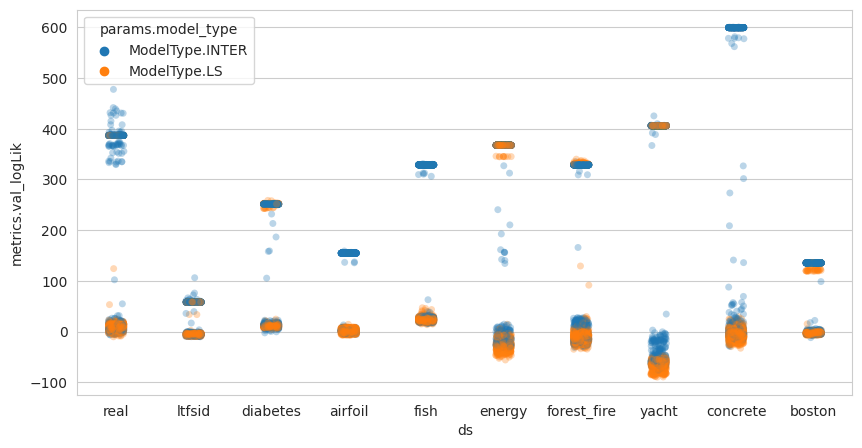

In [22]:
plt.figure(figsize=(10,5))
sns.stripplot(df, x='ds', y="metrics.val_logLik", hue='params.model_type', alpha=0.3)

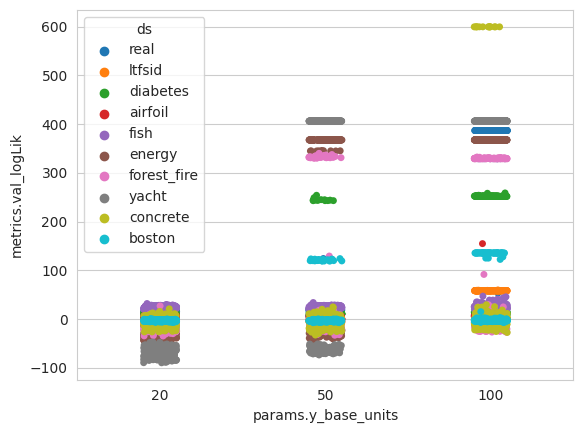

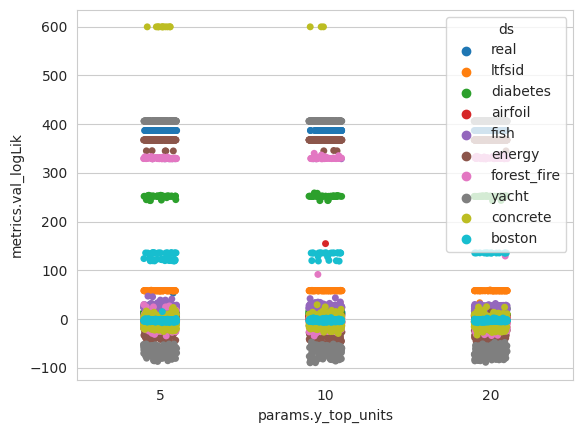

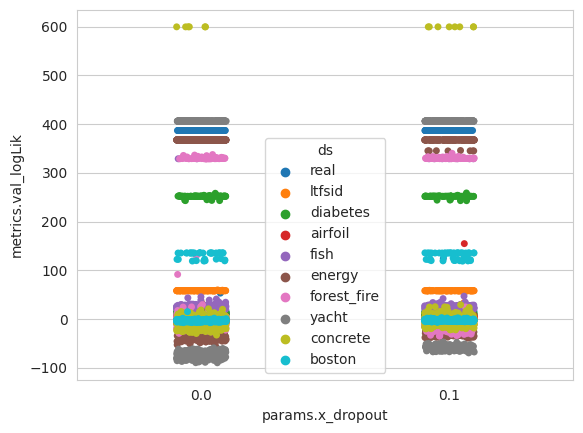

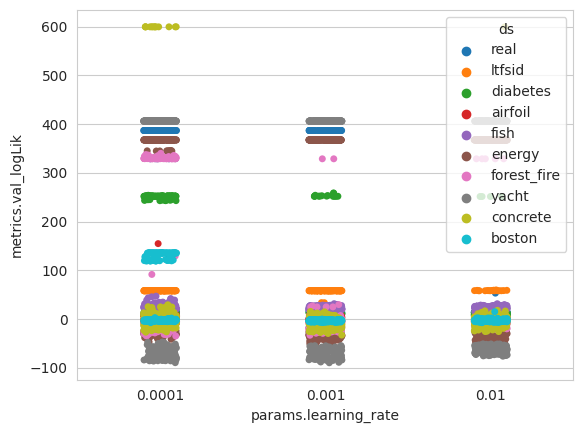

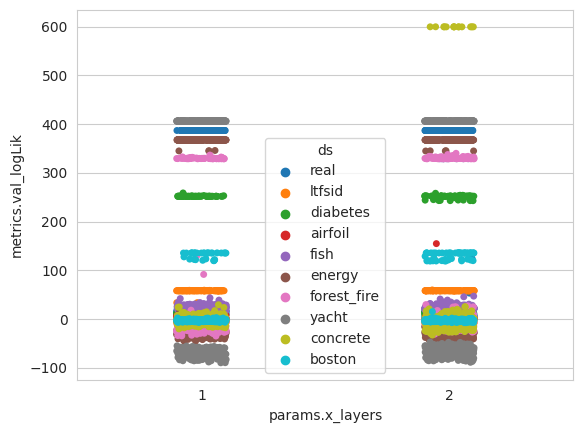

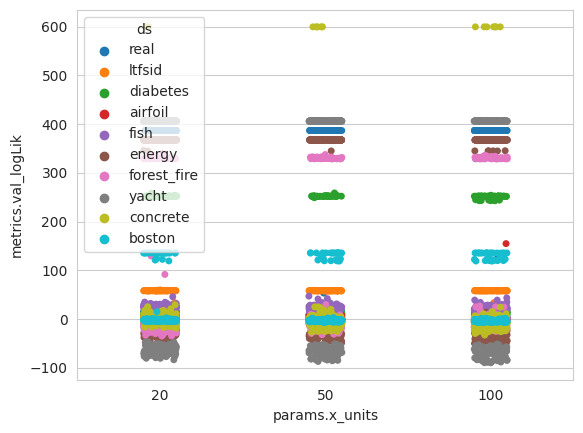

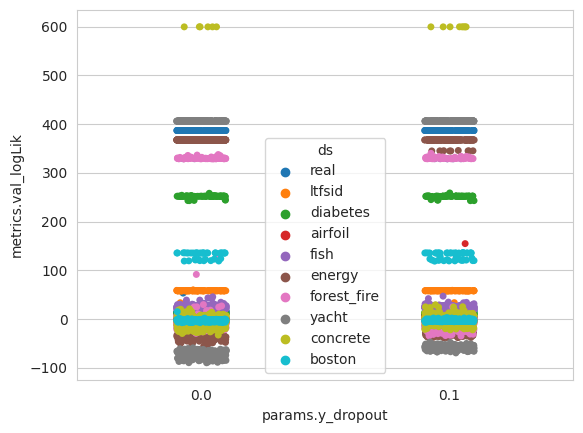

In [220]:
from sklearn.linear_model import LinearRegression
df_ls = df[df['params.model_type'] == "ModelType.LS"]
for param in relevant_params:
    plt.figure()
    sns.stripplot(df_ls, x=param, y="metrics.val_logLik", hue='ds')
# sns.stripplot(df, x='ds', y="metrics.val_logLik", hue='params.learning_rate')

In [110]:
df_ls

,experiment_id,ds,params.model_type,params.y_base_units,params.y_top_units,params.x_dropout,params.learning_rate,params.x_layers,params.x_units,params.seed,params.y_dropout,metrics.val_logLik
1,627665463722477363,real,ModelType.LS,100,20,0.1,0.0001,2,100,3,0.1,386.851624
5,627665463722477363,real,ModelType.LS,50,10,0.0,0.0001,2,20,3,0.0,10.653016
6,627665463722477363,real,ModelType.LS,100,20,0.1,0.0010,2,100,3,0.1,-0.665379
9,627665463722477363,real,ModelType.LS,100,20,0.1,0.0100,2,100,3,0.1,7.903621
11,627665463722477363,real,ModelType.LS,50,10,0.0,0.0010,2,20,3,0.0,15.031662
...,...,...,...,...,...,...,...,...,...,...,...,...
1939,823547104211283574,boston,ModelType.LS,50,10,0.0,0.0100,1,100,1,0.0,-4.331044
1940,823547104211283574,boston,ModelType.LS,50,5,0.0,0.0100,2,50,1,0.0,-7.500846
1941,823547104211283574,boston,ModelType.LS,20,20,0.0,0.0100,1,50,1,0.0,-5.466389
1942,823547104211283574,boston,ModelType.LS,20,5,0.0,0.0100,1,20,1,0.0,-3.478088


In [157]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_.pivot_table(index=relevant_params, columns="ds", values='metrics.val_logLik', aggfunc=np.mean)

ds                                                                                                                             airfoil   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0               7.041974  \
                                                                                             50             0.0               7.035337   
                                                                                             100            0.0               6.260666   
                                                                             2               20             0.0               6.296288   
                                                                                             50             0.0               0.636535   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1               2.315216   
                                                                                             100            0.1               1.576358   
                                                                             2               20             0.1               2.873812   
                                                                                             50             0.1               0.516048   
                                                                                             100            0.1              -0.042789   

ds                                                                                                                              boston   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0              -2.743449  \
                                                                                             50             0.0              -3.063749   
                                                                                             100            0.0              -3.375988   
                                                                             2               20             0.0              -2.278709   
                                                                                             50             0.0              -2.715109   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1              -1.446323   
                                                                                             100            0.1              -0.160293   
                                                                             2               20             0.1              -0.514002   
                                                                                             50             0.1              -1.637253   
                                                                                             100            0.1              -3.198308   

ds                                                                                                                             concrete   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout              
20                  5                  0.0              0.0001               1               20             0.0                5.492

In [224]:
df_ls_

ds                                                                                                                             airfoil   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0               7.041974  \
                                                                                             50             0.0               7.035337   
                                                                                             100            0.0               6.260666   
                                                                             2               20             0.0               6.296288   
                                                                                             50             0.0               0.636535   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1               2.315216   
                                                                                             100            0.1               1.576358   
                                                                             2               20             0.1               2.873812   
                                                                                             50             0.1               0.516048   
                                                                                             100            0.1              -0.042789   

ds                                                                                                                              boston   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0              -2.743449  \
                                                                                             50             0.0              -3.063749   
                                                                                             100            0.0              -3.375988   
                                                                             2               20             0.0              -2.278709   
                                                                                             50             0.0              -2.715109   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1              -1.446323   
                                                                                             100            0.1              -0.160293   
                                                                             2               20             0.1              -0.514002   
                                                                                             50             0.1              -1.637253   
                                                                                             100            0.1              -3.198308   

ds                                                                                                                             concrete   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout              
20                  5                  0.0              0.0001               1               20             0.0                5.492

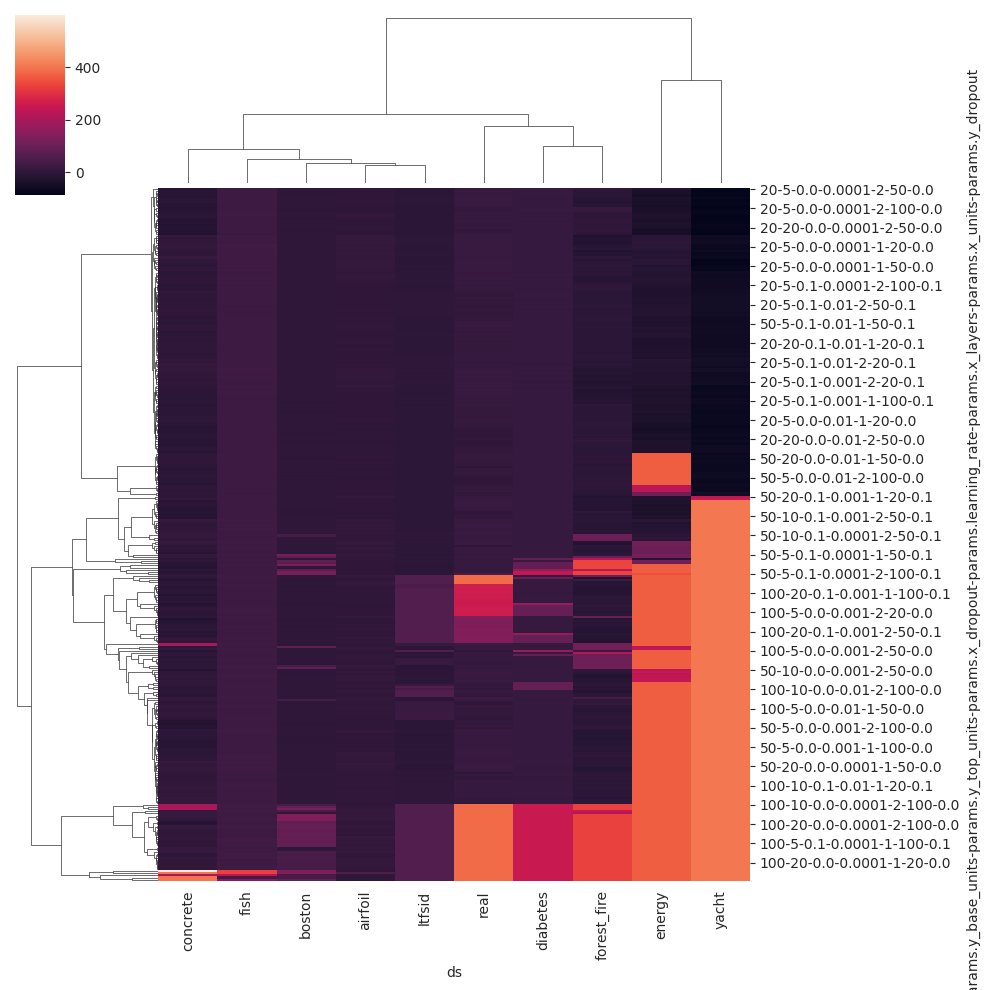

In [243]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="ds", values='metrics.val_logLik', aggfunc=np.mean)
sns.clustermap(df_ls_)

<Axes: xlabel='ds', ylabel='params.y_base_units-params.y_top_units-params.x_dropout-params.learning_rate-params.x_layers-params.x_units-params.y_dropout'>

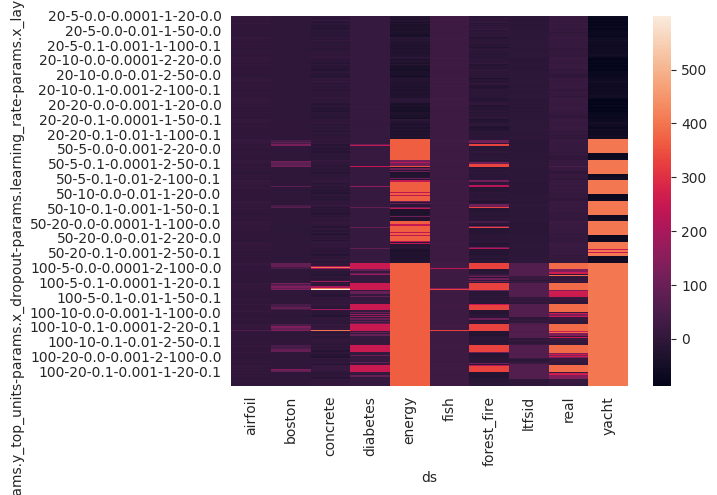

In [160]:
sns.heatmap(df_ls_)

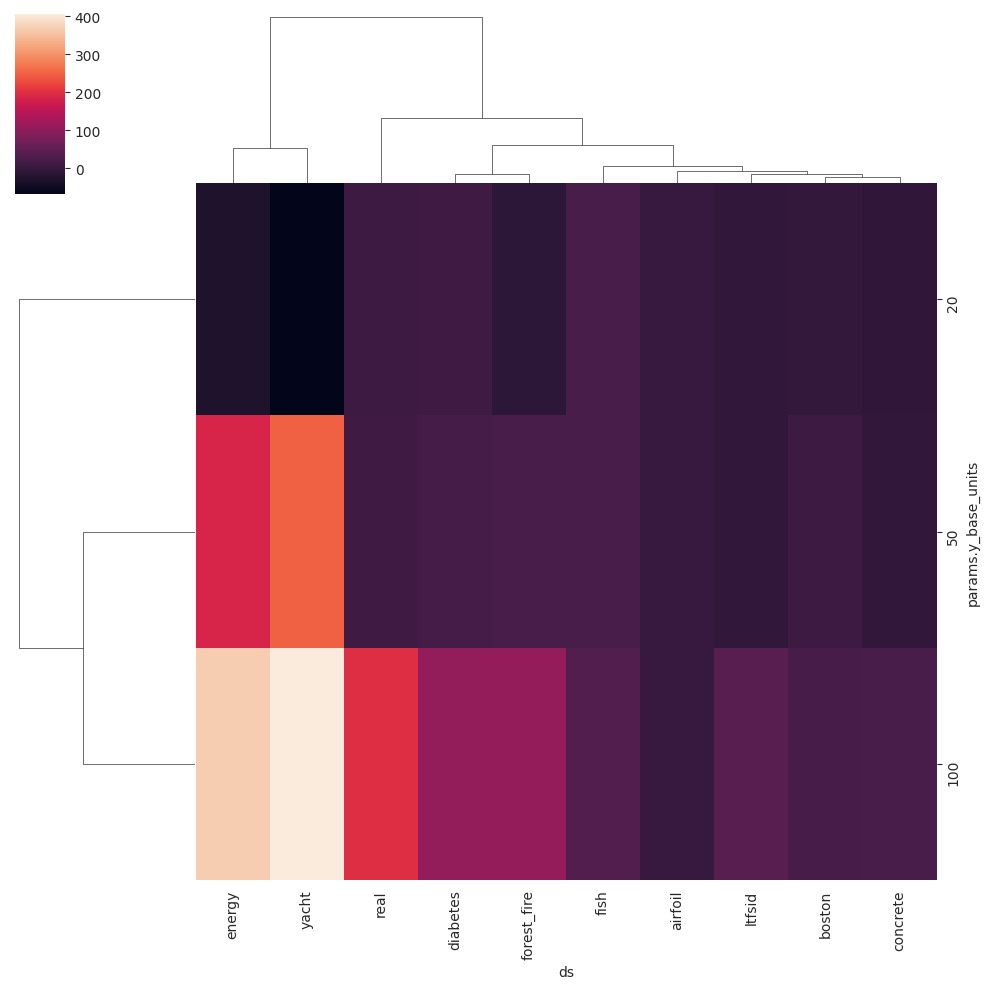

In [163]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_ = df_ls_.pivot_table(index=['params.y_base_units'], columns="ds", values='metrics.val_logLik', aggfunc=np.mean)
sns.clustermap(df_ls_)

In [ ]:
['params.y_base_units', 'params.y_top_units', 'params.x_dropout',
       'params.learning_rate', 'params.x_layers', 'params.x_units',
       'params.y_dropout']

In [174]:
from sklearn.linear_model import LinearRegression
y = df_ls['metrics.val_logLik'].to_numpy()[:,None]
print(y.shape)
for p in relevant_params:
    print(p)
    X = df_ls[p].to_numpy()[:,None]
    y = df_ls['metrics.val_logLik']
    print(X.shape)
    print(X.shape)
    model = LinearRegression()
    model.fit(X,y)
    print(model.coef_)

(9720, 1)
params.y_base_units
(9720, 1)
(9720, 1)
[1.71987022]
params.y_top_units
(9720, 1)
(9720, 1)
[-0.56181765]
params.x_dropout
(9720, 1)
(9720, 1)
[-99.0386122]
params.learning_rate
(9720, 1)
(9720, 1)
[-4782.36900768]
params.x_layers
(9720, 1)
(9720, 1)
[3.9877005]
params.x_units
(9720, 1)
(9720, 1)
[0.04295031]
params.y_dropout
(9720, 1)
(9720, 1)
[-99.0386122]


In [185]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="ds", values='metrics.val_logLik', aggfunc=np.mean)
df_ls_

ds                                                                                                                             airfoil   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0               7.041974  \
                                                                                             50             0.0               7.035337   
                                                                                             100            0.0               6.260666   
                                                                             2               20             0.0               6.296288   
                                                                                             50             0.0               0.636535   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1               2.315216   
                                                                                             100            0.1               1.576358   
                                                                             2               20             0.1               2.873812   
                                                                                             50             0.1               0.516048   
                                                                                             100            0.1              -0.042789   

ds                                                                                                                              boston   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0              -2.743449  \
                                                                                             50             0.0              -3.063749   
                                                                                             100            0.0              -3.375988   
                                                                             2               20             0.0              -2.278709   
                                                                                             50             0.0              -2.715109   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1              -1.446323   
                                                                                             100            0.1              -0.160293   
                                                                             2               20             0.1              -0.514002   
                                                                                             50             0.1              -1.637253   
                                                                                             100            0.1              -3.198308   

ds                                                                                                                             concrete   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout              
20                  5                  0.0              0.0001               1               20             0.0                5.492

In [202]:
for dataset, df_ds in df_ls.drop(columns=['params.model_type', 'experiment_id']).groupby('ds'):
    test = df_ds.drop(columns='ds')
    # print(df_ds)
    break
tes

,params.y_base_units,params.y_top_units,params.x_dropout,params.learning_rate,params.x_layers,params.x_units,params.seed,params.y_dropout,metrics.val_logLik
1,20,10,0.1,0.0001,1,100,2,0.1,6.330238
4,20,10,0.1,0.0010,1,100,2,0.1,-0.777696
6,20,10,0.1,0.0100,1,100,2,0.1,2.193360
7,100,20,0.1,0.0001,2,50,1,0.1,1.868301
11,20,10,0.1,0.0001,1,50,3,0.1,6.970502
...,...,...,...,...,...,...,...,...,...
1939,50,10,0.0,0.0100,1,100,1,0.0,-1.126688
1940,50,5,0.0,0.0100,2,50,1,0.0,-1.452015
1941,20,20,0.0,0.0100,1,50,1,0.0,1.930776
1942,20,10,0.0,0.0100,2,20,1,0.0,0.723718


In [ ]:
corrwith(test['metrics.val_logLik'])

In [209]:
test['metrics.val_logLik']

1       6.330238
4      -0.777696
6       2.193360
7       1.868301
11      6.970502
          ...   
1939   -1.126688
1940   -1.452015
1941    1.930776
1942    0.723718
1943    0.662427
Name: metrics.val_logLik, Length: 972, dtype: float64

In [211]:
test[relevant_params].corrwith(test['metrics.val_logLik'], method='spearman')

params.y_base_units     0.025870
params.y_top_units      0.020931
params.x_dropout        0.068909
params.learning_rate   -0.404190
params.x_layers        -0.510487
params.x_units         -0.426000
params.y_dropout        0.068909
dtype: float64

In [207]:
df_ls_ = df_ls.copy(True)
df_ls_.drop(columns=['params.model_type', 'experiment_id'], inplace=True)
df_ls_ = df_ls_.pivot_table(index=relevant_params, columns="ds", values='metrics.val_logLik', aggfunc=np.mean)
df_ls_

ds                                                                                                                             airfoil   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0               7.041974  \
                                                                                             50             0.0               7.035337   
                                                                                             100            0.0               6.260666   
                                                                             2               20             0.0               6.296288   
                                                                                             50             0.0               0.636535   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1               2.315216   
                                                                                             100            0.1               1.576358   
                                                                             2               20             0.1               2.873812   
                                                                                             50             0.1               0.516048   
                                                                                             100            0.1              -0.042789   

ds                                                                                                                              boston   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout             
20                  5                  0.0              0.0001               1               20             0.0              -2.743449  \
                                                                                             50             0.0              -3.063749   
                                                                                             100            0.0              -3.375988   
                                                                             2               20             0.0              -2.278709   
                                                                                             50             0.0              -2.715109   
...                                                                                                                                ...   
100                 20                 0.1              0.0100               1               50             0.1              -1.446323   
                                                                                             100            0.1              -0.160293   
                                                                             2               20             0.1              -0.514002   
                                                                                             50             0.1              -1.637253   
                                                                                             100            0.1              -3.198308   

ds                                                                                                                             concrete   
params.y_base_units params.y_top_units params.x_dropout params.learning_rate params.x_layers params.x_units params.y_dropout              
20                  5                  0.0              0.0001               1               20             0.0                5.492

In [215]:
sns.swarmplot(df, x='params.y_base_units', y='metrics.val_logLik', hue='ds')


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fdbcf288700> (for post_execute):


KeyboardInterrupt: 

In [2]:
from hp import *
from utils import *
get_hp_space()[0]

2023-05-09 10:17:44.035691: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-09 10:17:44.068204: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-09 10:17:44.068983: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 10:17:44.598908: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-09 10:17:45.331593: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

{'seed': 1,
 'net_x_arch_trunk_args': {'x_units': 20, 'x_layers': 1, 'dropout': 0},
 'net_y_size_trunk_args': {'y_base_units': 20, 'y_top_units': 5, 'dropout': 0},
 'optimizer': <keras.optimizers.legacy.adam.Adam at 0x7fc0e6a01270>,
 'base_distribution': <tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>,
 'model_type': <ModelType.LS: 'ls'>}

In [10]:
data_path = "energy"

log_file: str = "train.log"
log_level: str = "info"
setup_logger(log_file, log_level)

logging.info(f"TFP Version {tfp.__version__}")
logging.info(f"TF  Version {tf.__version__}")

setup_folders(data_path)

hp_space = {
            "seed": 1,
            "net_x_arch_trunk_args": {
                "x_units": 20,
                "x_layers": 1,
                "dropout": 0,
            },
            "net_y_size_trunk_args": {
                "y_base_units": 100,
                "y_top_units": 5,
                "dropout": 0.8,
            },
            "optimizer": Adam(learning_rate=1e-2),
            "base_distribution": tfd.Normal(loc=0, scale=1),
            "model_type": ModelType.LS,
        }
print(hp_space)
logging.info(f"Size of search space: {len(hp_space)}")

mlflow.autolog()
experiment_id = mlflow.set_experiment(f"{data_path}_runs")


frame = inspect.currentframe()
args, _, _, values = inspect.getargvalues(frame)
arg_vals = {arg: values[arg] for arg in args}

fit_args = (hp_space, data_path, experiment_id.experiment_id, arg_vals, False)
fit_args

INFO:root:TFP Version 0.19.0
INFO:root:TF  Version 2.12.0
{'seed': 1, 'net_x_arch_trunk_args': {'x_units': 20, 'x_layers': 1, 'dropout': 0}, 'net_y_size_trunk_args': {'y_base_units': 100, 'y_top_units': 5, 'dropout': 0.8}, 'optimizer': <keras.optimizers.legacy.adam.Adam object at 0x7fc0a21daa40>, 'base_distribution': <tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>, 'model_type': <ModelType.LS: 'ls'>}
INFO:root:Size of search space: 6


2023/05/09 10:18:40 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2023/05/09 10:18:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/05/09 10:18:40 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2023/05/09 10:18:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


({'seed': 1,
  'net_x_arch_trunk_args': {'x_units': 20, 'x_layers': 1, 'dropout': 0},
  'net_y_size_trunk_args': {'y_base_units': 100,
   'y_top_units': 5,
   'dropout': 0.8},
  'optimizer': <keras.optimizers.legacy.adam.Adam at 0x7fc0a21daa40>,
  'base_distribution': <tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>,
  'model_type': <ModelType.LS: 'ls'>},
 'energy',
 '921567085744556525',
 {},
 False)

In [11]:
def fit_func(params, data_path, experiment_id, args, fast):

    data = load_data(data_path)
    train_data = (data["x_train"], data["y_train"])
    val_data = (data["x_test"], data["y_test"])

    mlflow.start_run(experiment_id=experiment_id)

    log_fit_params(args, params)

    model_type = params["model_type"]
    model_kwargs = get_model_kwargs(model_type)
    params = {**params, **model_kwargs}

    x_args = params.pop("net_x_arch_trunk_args")
    params["net_x_arch_trunk"] = relu_network(
        [x_args["x_units"]] * x_args["x_layers"], dropout=x_args["dropout"]
    )
    y_args = params.pop("net_y_size_trunk_args")
    params["net_y_size_trunk"] = nonneg_tanh_network(
        (y_args["y_base_units"], y_args["y_base_units"], y_args["y_top_units"]),
        dropout=y_args["dropout"],
    )

    seed = params.pop("seed")
    set_seeds(seed)

    hist, neat_model = fit(
        epochs=20 if fast else 10_000,
        train_data=train_data,
        val_data=val_data,
        **params,
    )

    mlflow.log_metric("val_logLik", neat_model.evaluate(x=train_data, y=train_data[1]))
    mlflow.log_metric("train_logLik", neat_model.evaluate(x=val_data, y=val_data[1]))

    mlflow.end_run()
    return neat_model, hist

In [12]:
neat_model, hist = fit_func(*fit_args)

INFO:root:setting random seed to 1
Epoch 1/10000
22/22 [==============================] - 1s 8ms/step - logLik: 616.6627 - val_logLik: 253.3700
Epoch 2/10000
22/22 [==============================] - 0s 2ms/step - logLik: 599.2114 - val_logLik: 252.0380
Epoch 3/10000
22/22 [==============================] - 0s 2ms/step - logLik: 597.9536 - val_logLik: 251.7243
Epoch 4/10000
22/22 [==============================] - 0s 2ms/step - logLik: 597.6146 - val_logLik: 251.6417
Epoch 5/10000
22/22 [==============================] - 0s 2ms/step - logLik: 597.4198 - val_logLik: 251.5650
Epoch 6/10000
22/22 [==============================] - 0s 2ms/step - logLik: 597.2906 - val_logLik: 251.5286
Epoch 7/10000
22/22 [==============================] - 0s 2ms/step - logLik: 597.2106 - val_logLik: 251.4815
Epoch 8/10000
22/22 [==============================] - 0s 2ms/step - logLik: 597.1546 - val_logLik: 251.4695
Epoch 9/10000
22/22 [==============================] - 0s 2ms/step - logLik: 597.1204 - val_l

2023/05/09 10:19:18 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2023/05/09 10:19:18 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023-05-09 10:19:19.120113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-05-09 10:19:19.132324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder

INFO:tensorflow:Assets written to: /tmp/tmp5rqdlmg7/model/data/model/assets
INFO:tensorflow:Assets written to: /tmp/tmp5rqdlmg7/model/data/model/assets


2023/05/09 10:19:22 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp5rqdlmg7/model, flavor: tensorflow), fall back to return ['tensorflow==2.12.0']. Set logging level to DEBUG to see the full traceback.
2023/05/09 10:19:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/daniel/miniconda3/envs/py10/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/3cd98ce4a7174516b6194b13b82774eb/artifacts/model/data
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/3cd98ce4a7174516b6194b13b82774eb/artifacts/model/data/model
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/3cd98ce4a7174516b6194b13b82774eb/artifacts/model/data/model/variables
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/3cd98ce4a7174516b6194b13b82774eb/artifacts/model/data/model/assets
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/3cd98ce4a7174516b6194b13b82774eb/artifacts/tensorboard_logs/train
INFO:root:creating /home/daniel/remote/NEAT/neat/python/mlruns/921567085744556525/3cd98ce4a7174516b6194b13b82774eb/artifacts/tensorboard_logs/validation
3/3 [==============================] - 0s 1ms/step - logLik: 2.0400


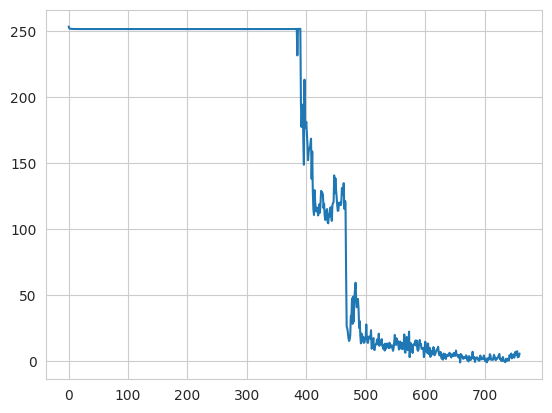

In [13]:
plt.plot(hist.history['val_logLik'])

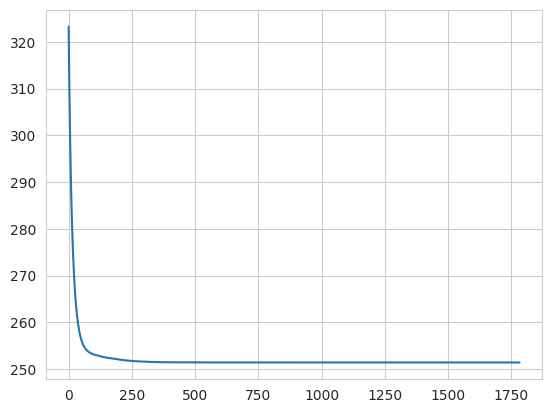

In [264]:
plt.plot(hist.history['val_logLik'])